# House Price Prediction Project

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
dataset = pd.read_csv('HousePriceData.csv')
org_integrated_dataset = dataset.copy()
dataset.shape

(1500, 18)

In [3]:
dataset.head()

,ID,YearBuilt,Area,NumBedRooms,AreaBedroom,BedroomCond,NumKitch,AreaKitch,KitchCond,Garage,GarageArea,Electricity,AirConditioning,NumHearth,HouseCondition,Pool,Garden,Price
0,1,2018.0,1065.0,6.0,537.0,Excellent,1.0,354.0,Excellent,Yes,338.0,Yes,Typical,3.0,Excellent,Yes,Yes,311620
1,2,2012.0,1405.0,6.0,378.0,Average,1.0,298.0,Average,Yes,400.0,Yes,Excellent,3.0,Excellent,Yes,Yes,257880
2,3,2020.0,877.0,3.0,257.0,Good,2.0,332.0,Excellent,Yes,324.0,Yes,VeryGood,4.0,Bad,Yes,Yes,186180
3,4,1979.0,827.0,3.0,391.0,VeryGood,2.0,398.0,Typical,Yes,292.0,Yes,Good,2.0,VeryGood,Yes,No,168760
4,5,2016.0,1281.0,5.0,329.0,Typical,3.0,364.0,Good,Yes,334.0,Yes,Excellent,2.0,VeryBad,Yes,Yes,244760


In [4]:
dataset.columns.tolist()

['ID',
 'YearBuilt',
 'Area',
 'NumBedRooms',
 'AreaBedroom',
 'BedroomCond',
 'NumKitch',
 'AreaKitch',
 'KitchCond',
 'Garage',
 'GarageArea',
 'Electricity',
 'AirConditioning',
 'NumHearth',
 'HouseCondition',
 'Pool',
 'Garden',
 'Price']

In [5]:
dataset.set_index('ID', inplace=True)
dataset

,YearBuilt,Area,NumBedRooms,AreaBedroom,BedroomCond,NumKitch,AreaKitch,KitchCond,Garage,GarageArea,Electricity,AirConditioning,NumHearth,HouseCondition,Pool,Garden,Price
ID,,,,,,,,,,,,,,,,,
1,2018.0,1065.0,6.0,537.0,Excellent,1.0,354.0,Excellent,Yes,338.0,Yes,Typical,3.0,Excellent,Yes,Yes,311620
2,2012.0,1405.0,6.0,378.0,Average,1.0,298.0,Average,Yes,400.0,Yes,Excellent,3.0,Excellent,Yes,Yes,257880
3,2020.0,877.0,3.0,257.0,Good,2.0,332.0,Excellent,Yes,324.0,Yes,VeryGood,4.0,Bad,Yes,Yes,186180
4,1979.0,827.0,3.0,391.0,VeryGood,2.0,398.0,Typical,Yes,292.0,Yes,Good,2.0,VeryGood,Yes,No,168760
5,2016.0,1281.0,5.0,329.0,Typical,3.0,364.0,Good,Yes,334.0,Yes,Excellent,2.0,VeryBad,Yes,Yes,244760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1989.0,NaN,6.0,340.0,VeryGood,2.0,250.0,Typical,Yes,NaN,Yes,VeryGood,NaN,Average,Yes,Yes,321380
1497,2016.0,NaN,6.0,361.0,Good,3.0,278.0,VeryBad,Yes,NaN,Yes,Typical,NaN,Typical,Yes,No,268280
1498,1954.0,NaN,7.0,397.0,Typical,2.0,267.0,Good,Yes,NaN,Yes,Bad,NaN,VeryGood,Yes,Yes,479300


### Brief information of data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearBuilt        1434 non-null   float64
 1   Area             1415 non-null   float64
 2   NumBedRooms      1420 non-null   float64
 3   AreaBedroom      1401 non-null   float64
 4   BedroomCond      1397 non-null   object 
 5   NumKitch         1428 non-null   float64
 6   AreaKitch        1422 non-null   float64
 7   KitchCond        1474 non-null   object 
 8   Garage           1419 non-null   object 
 9   GarageArea       1410 non-null   float64
 10  Electricity      1425 non-null   object 
 11  AirConditioning  1394 non-null   object 
 12  NumHearth        1389 non-null   float64
 13  HouseCondition   1417 non-null   object 
 14  Pool             1392 non-null   object 
 15  Garden           1431 non-null   object 
 16  Price            1500 non-null   int64  
dtypes: float64(8),

In [7]:
int_variables = dataset.select_dtypes(include=['int64']).columns
int_variables

Index(['Price'], dtype='object')

In [8]:
float_variables = dataset.select_dtypes(include=['float64']).columns
float_variables

Index(['YearBuilt', 'Area', 'NumBedRooms', 'AreaBedroom', 'NumKitch',
       'AreaKitch', 'GarageArea', 'NumHearth'],
      dtype='object')

In [9]:
cat_variables = dataset.select_dtypes(include=['O']).columns
cat_variables

Index(['BedroomCond', 'KitchCond', 'Garage', 'Electricity', 'AirConditioning',
       'HouseCondition', 'Pool', 'Garden'],
      dtype='object')

### Statistical Information of data

In [10]:
dataset.describe()

,YearBuilt,Area,NumBedRooms,AreaBedroom,NumKitch,AreaKitch,GarageArea,NumHearth,Price
count,1434.000000,1415.000000,1420.000000,1401.000000,1428.000000,1422.000000,1410.000000,1389.000000,1500.000000
mean,1986.343096,1263.633922,5.094366,327.068522,1.946779,323.971167,324.741844,2.508279,292657.826667
std,21.708421,390.756906,1.696357,44.733364,0.702361,42.259210,41.706552,0.972665,124433.334183
min,1950.000000,608.000000,2.000000,250.000000,1.000000,250.000000,250.000000,1.000000,120300.000000
25%,1967.000000,936.000000,4.000000,289.000000,1.000000,289.000000,288.250000,2.000000,189200.000000
50%,1986.000000,1249.000000,5.000000,328.000000,2.000000,322.000000,324.000000,3.000000,270100.000000
75%,2007.000000,1600.000000,6.000000,365.000000,2.000000,361.000000,362.000000,3.000000,369500.000000
max,2023.000000,1996.000000,8.000000,537.000000,3.000000,400.000000,400.000000,4.000000,596540.000000



### Handling missing values

Visualise Null/Missing values

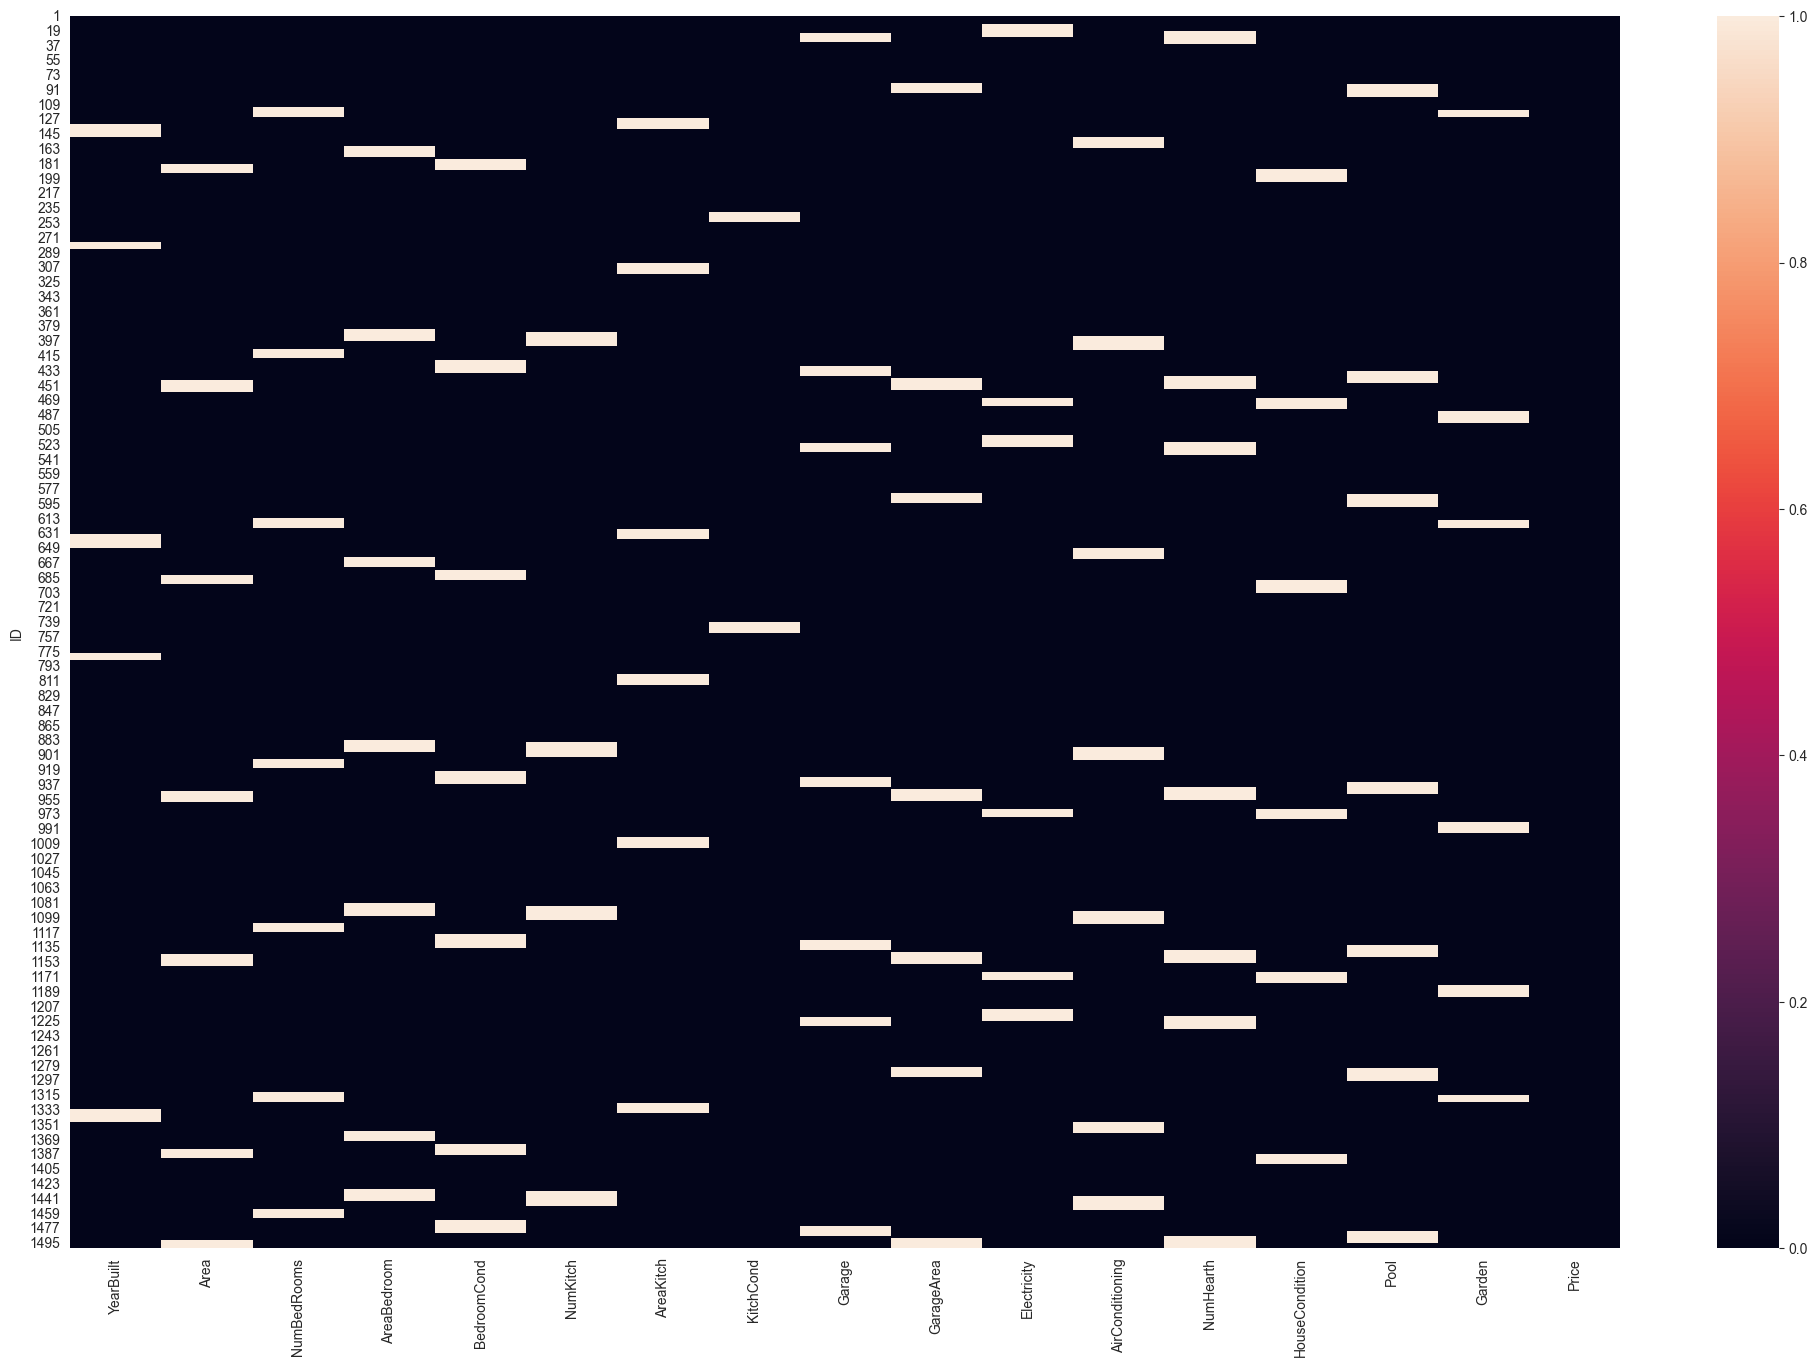

In [11]:
plt.figure(figsize=(25, 16))
sns.heatmap(dataset.isnull())
plt.show()

Get the null percentage of each features

In [12]:
null_percent = dataset.isnull().sum() / dataset.shape[0] * 100
null_percent

YearBuilt          4.400000
Area               5.666667
NumBedRooms        5.333333
AreaBedroom        6.600000
BedroomCond        6.866667
NumKitch           4.800000
AreaKitch          5.200000
KitchCond          1.733333
Garage             5.400000
GarageArea         6.000000
Electricity        5.000000
AirConditioning    7.066667
NumHearth          7.400000
HouseCondition     5.533333
Pool               7.200000
Garden             4.600000
Price              0.000000
dtype: float64

Checking for variables having null values more than 50%

In [13]:
null_percent[null_percent > 50]

Series([], dtype: float64)

Checking for variables having null values between 20% and 50%

In [14]:
null_percent[(null_percent > 20) & (null_percent < 50)]

Series([], dtype: float64)

Checking for variables having null values less than 20%

In [15]:
null_percent[null_percent < 20]

YearBuilt          4.400000
Area               5.666667
NumBedRooms        5.333333
AreaBedroom        6.600000
BedroomCond        6.866667
NumKitch           4.800000
AreaKitch          5.200000
KitchCond          1.733333
Garage             5.400000
GarageArea         6.000000
Electricity        5.000000
AirConditioning    7.066667
NumHearth          7.400000
HouseCondition     5.533333
Pool               7.200000
Garden             4.600000
Price              0.000000
dtype: float64

### Imputing missing values

In [16]:
missing_value_variables = null_percent[null_percent > 0]
print(len(missing_value_variables))
missing_value_variables

16


YearBuilt          4.400000
Area               5.666667
NumBedRooms        5.333333
AreaBedroom        6.600000
BedroomCond        6.866667
NumKitch           4.800000
AreaKitch          5.200000
KitchCond          1.733333
Garage             5.400000
GarageArea         6.000000
Electricity        5.000000
AirConditioning    7.066667
NumHearth          7.400000
HouseCondition     5.533333
Pool               7.200000
Garden             4.600000
dtype: float64

##### Handling Integer variables

In [17]:
int_missing_variables = missing_value_variables[missing_value_variables.keys().isin(int_variables)]
int_missing_variables

Series([], dtype: float64)

No Missing values in Integer variables

##### Handling Float variables

In [18]:
float_missing_variables = missing_value_variables[missing_value_variables.keys().isin(float_variables)]
float_missing_variables

YearBuilt      4.400000
Area           5.666667
NumBedRooms    5.333333
AreaBedroom    6.600000
NumKitch       4.800000
AreaKitch      5.200000
GarageArea     6.000000
NumHearth      7.400000
dtype: float64

##### Data Distribution function

In [19]:
def data_distribution(data):
    sns.histplot(data, kde=True)
    plt.show()

In [20]:
def oldvsnew_distribution(old, new, var):
    plt.subplot(121)
    sns.histplot(old[var], kde=True)
    plt.title('Old Distribution', fontsize=20)
    plt.subplot(122)
    sns.histplot(new[var], kde=True)
    plt.title('New Distribution', fontsize=20)
    plt.show()

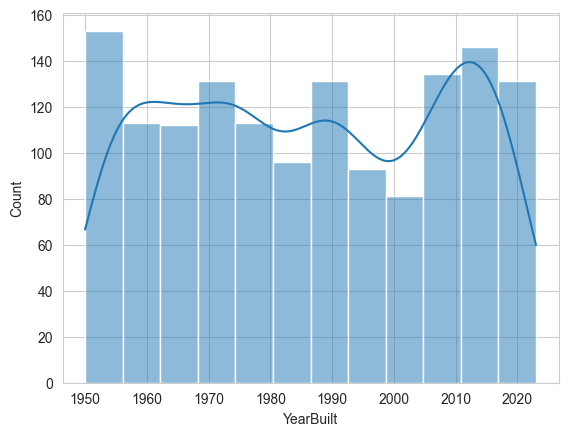

In [21]:
data_distribution(dataset['YearBuilt'])

In [22]:
dataset.YearBuilt.replace(np.nan, dataset['YearBuilt'].mean(), inplace=True)
dataset.YearBuilt = dataset.YearBuilt.astype(int)
dataset.YearBuilt.isnull().sum()

0

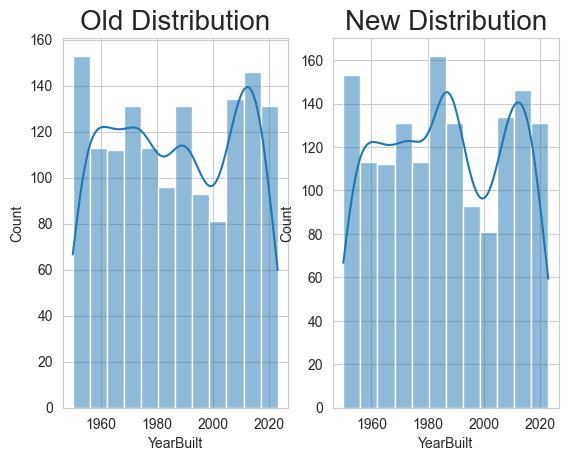

In [23]:
oldvsnew_distribution(org_integrated_dataset, dataset, 'YearBuilt')

Handling rest of float type features

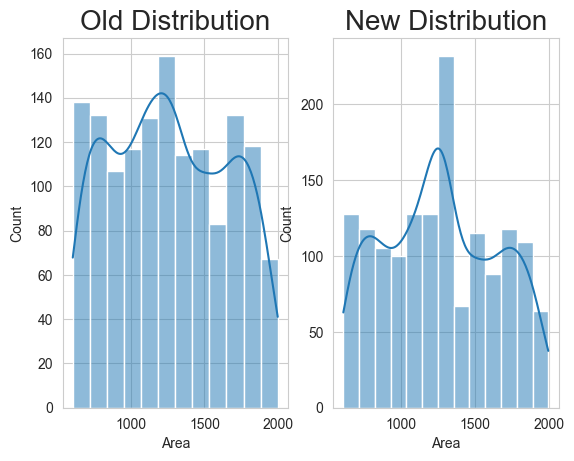

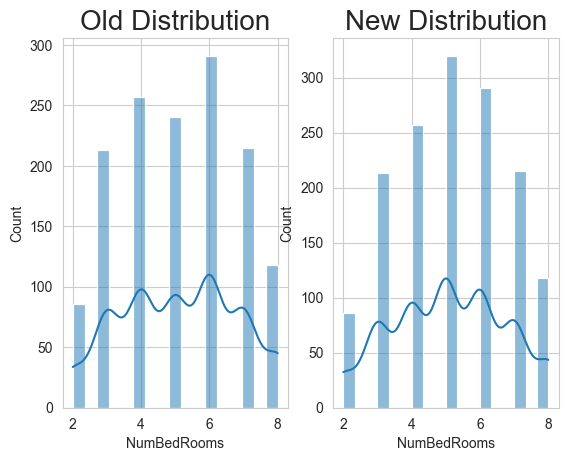

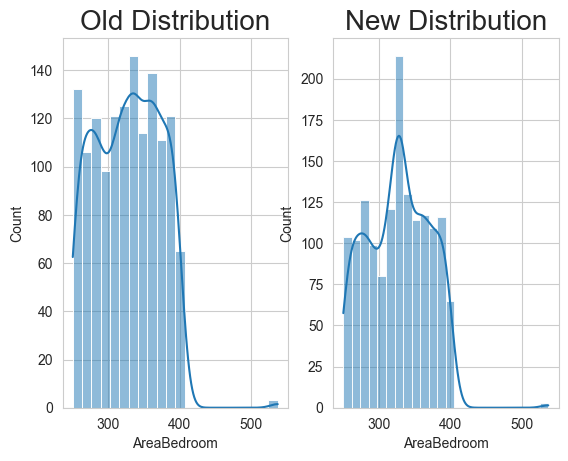

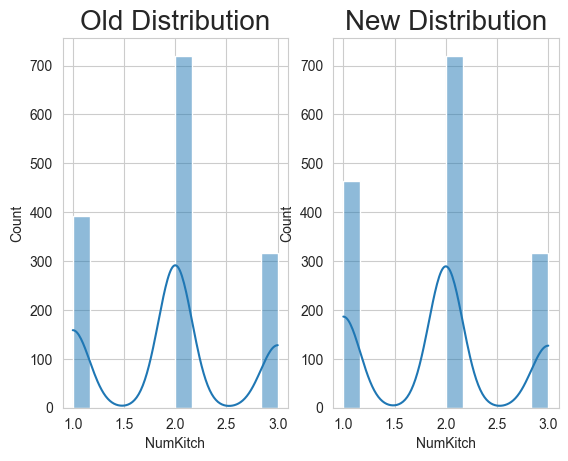

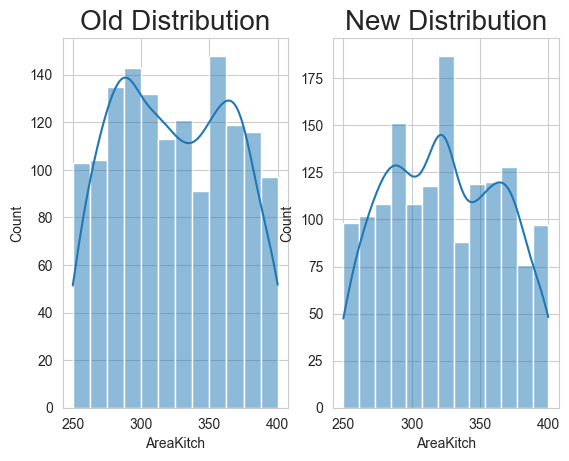

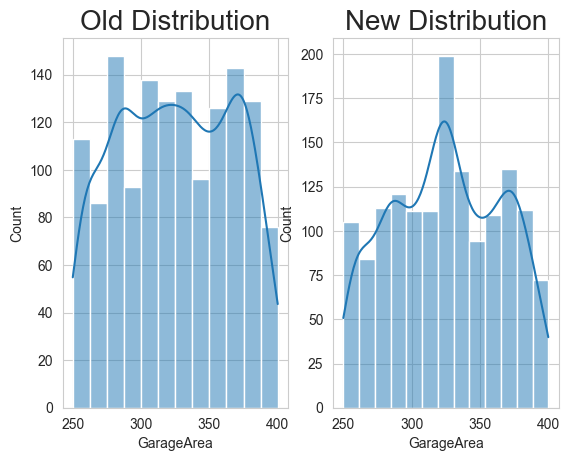

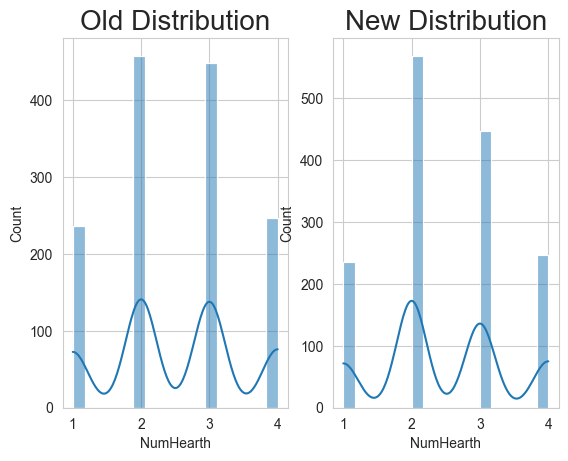

In [24]:
num_var_const = ['Area', 'NumBedRooms', 'AreaBedroom', 'NumKitch', 'AreaKitch', 'GarageArea', 'NumHearth']
for var in num_var_const:
    dataset[var].replace(np.nan, dataset[var].mean(), inplace=True)
    dataset[var] = dataset[var].astype(int)
    oldvsnew_distribution(org_integrated_dataset, dataset, var)

##### Handling categorical variables

In [25]:
cat_missing_variables = missing_value_variables[missing_value_variables.keys().isin(cat_variables)]
cat_missing_variables

BedroomCond        6.866667
KitchCond          1.733333
Garage             5.400000
Electricity        5.000000
AirConditioning    7.066667
HouseCondition     5.533333
Pool               7.200000
Garden             4.600000
dtype: float64

In [26]:
cat_var_mode = ['BedroomCond', 'KitchCond', 'Garage', 'Electricity', 'AirConditioning', 'HouseCondition', 'Pool',
                'Garden']
for var in cat_var_mode:
    dataset[var].replace(np.nan, dataset[var].mode()[0], inplace=True)

#### Cleaned dataset

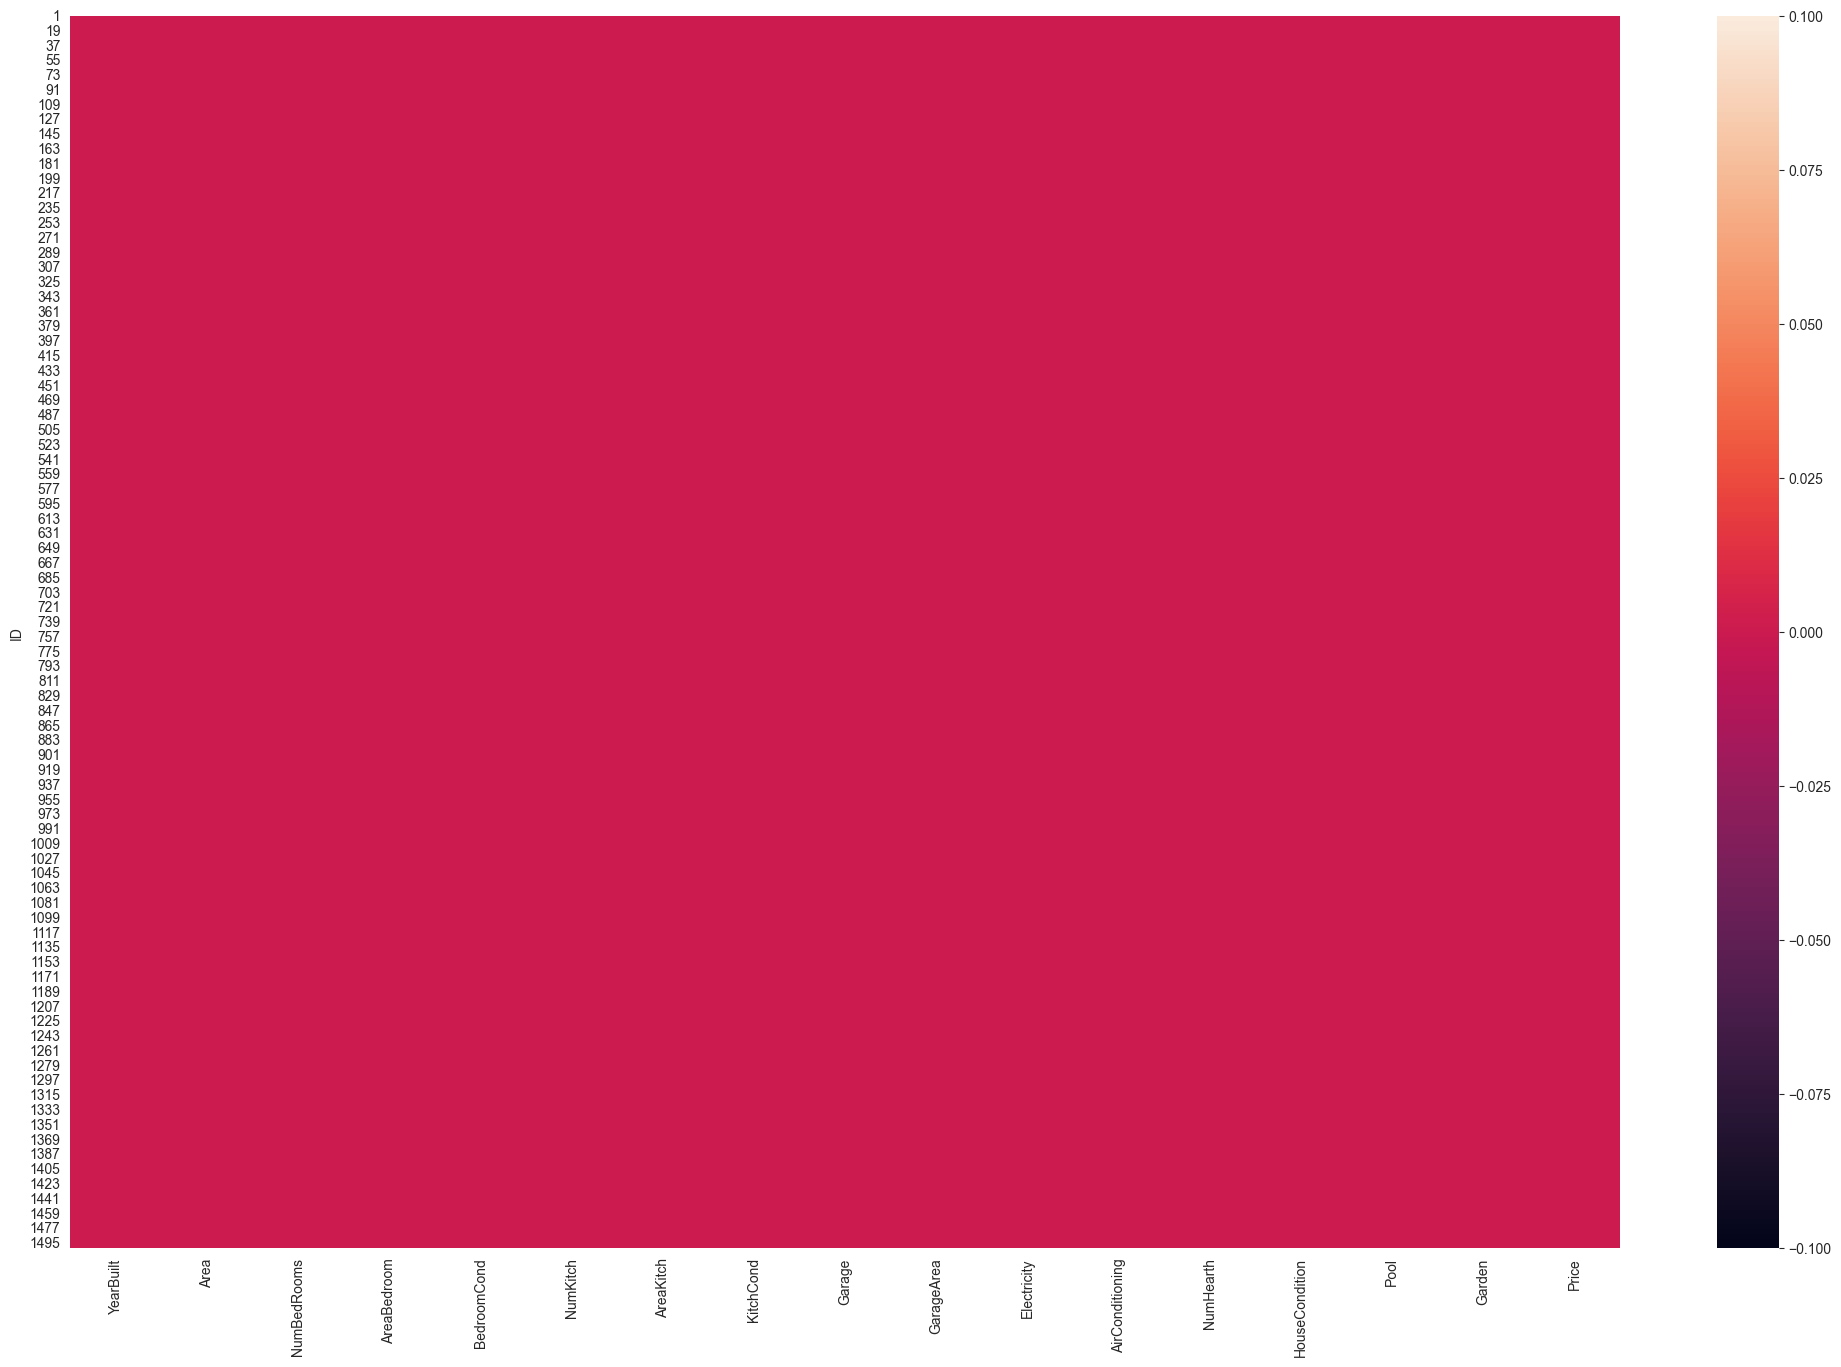

In [27]:
plt.figure(figsize=(25, 16))
sns.heatmap(dataset.isnull())
plt.show()

### Feature Transformation

#### Converting categorical feature to numerical feature
##### Ordinal Encoding

In [28]:
from pandas.api.types import CategoricalDtype

In [29]:
dataset['BedroomCond'].unique()

array(['Excellent', 'Average', 'Good', 'VeryGood', 'Typical', 'Bad',
       'VeryBad'], dtype=object)

In [30]:
cond = ['BedroomCond', 'KitchCond', 'AirConditioning', 'HouseCondition']
for var in cond:
    dataset[var] = dataset[var].astype(
        CategoricalDtype(categories=['Excellent', 'VeryGood', 'Good', 'Average', 'Typical', 'Bad', 'VeryBad'],
                         ordered=True)).cat.codes

In [31]:
cond = ['Garage', 'Electricity', 'Pool', 'Garden']
for var in cond:
    dataset[var] = dataset[var].astype(
        CategoricalDtype(categories=['Yes', 'No'], ordered=True)).cat.codes

In [32]:
dataset

,YearBuilt,Area,NumBedRooms,AreaBedroom,BedroomCond,NumKitch,AreaKitch,KitchCond,Garage,GarageArea,Electricity,AirConditioning,NumHearth,HouseCondition,Pool,Garden,Price
ID,,,,,,,,,,,,,,,,,
1,2018,1065,6,537,0,1,354,0,0,338,0,4,3,0,0,0,311620
2,2012,1405,6,378,3,1,298,3,0,400,0,0,3,0,0,0,257880
3,2020,877,3,257,2,2,332,0,0,324,0,1,4,5,0,0,186180
4,1979,827,3,391,1,2,398,4,0,292,0,2,2,1,0,1,168760
5,2016,1281,5,329,4,3,364,2,0,334,0,0,2,6,0,0,244760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1989,1263,6,340,1,2,250,4,0,324,0,1,2,3,0,0,321380
1497,2016,1263,6,361,2,3,278,6,0,324,0,4,2,4,0,1,268280
1498,1954,1263,7,397,4,2,267,2,0,324,0,5,2,1,0,0,479300


## Splitting data for training

In [33]:
X=dataset.drop('Price', axis=1)
Y =dataset.Price
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1200, 16), (300, 16), (1200,), (300,))

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

sc_object = StandardScaler()
sc_object.fit(X_train)
X_train = sc_object.transform(X_train)
X_test = sc_object.transform(X_test)

## Model Training

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.isotonic import IsotonicRegression

from xgboost import XGBRegressor

In [36]:
models = {
    'a': ['LinearRegression', LinearRegression()],
    'b': ['SGDRegressor', SGDRegressor()],
    'c': ['KNeighborsRegressor', KNeighborsRegressor()],
    'd': ['DecisionTreeRegressor', DecisionTreeRegressor()],
    'e': ['SVR', SVR()],
    'f': ['GaussianProcessRegressor', GaussianProcessRegressor()],
    'g': ['RandomForestRegressor', RandomForestRegressor()],
    'h': ['GradientBoostingRegressor', GradientBoostingRegressor()],
    # 'i': ['MLPRegressor', MLPRegressor()],
    # 'j': ['IsotonicRegression', IsotonicRegression()],
    'k': ['XGBRegressor', XGBRegressor()]
}

In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def trainmodel(model, X_train, y_train):
    kf = KFold(n_splits=7, shuffle=True, random_state=42)
    scores = [(cross_val_score(model, X_train, y_train, scoring=make_scorer(r2_score), cv=kf)).mean()]
    return scores

In [38]:
models_score = []

for model in models:
    print('----------------\nModel Name: ',models[model][0])
    score = trainmodel(models[model][1], X_train, Y_train)
    print('Score of the model: ', score)
    models_score.append([models[model][0], score[0]])

----------------
Model Name:  LinearRegression
Score of the model:  [0.7352425079150405]
----------------
Model Name:  SGDRegressor
Score of the model:  [0.7356231871081013]
----------------
Model Name:  KNeighborsRegressor
Score of the model:  [0.7116690544175276]
----------------
Model Name:  DecisionTreeRegressor
Score of the model:  [0.9473266757574166]
----------------
Model Name:  SVR
Score of the model:  [-0.03129444028432617]
----------------
Model Name:  GaussianProcessRegressor
Score of the model:  [0.4214488013637733]
----------------
Model Name:  RandomForestRegressor
Score of the model:  [0.9589223716732908]
----------------
Model Name:  GradientBoostingRegressor
Score of the model:  [0.8934888027301494]
----------------
Model Name:  XGBRegressor
Score of the model:  [0.9724315532374491]


In [39]:
XGB = XGBRegressor()

### Model Evaluation

In [40]:
XGB.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [42]:
Y_pred = XGB.predict(X_test)

In [43]:
r2_score(Y_test, Y_pred)

0.9780735319037606

In [44]:
mean_squared_error(Y_test, Y_pred)

356042112.28799075

In [45]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

18869.078204512025

In [46]:
mean_absolute_error(Y_test, Y_pred)

3891.6970833333335

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1, random_state=0)

In [48]:
XGB.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [49]:
import pickle

In [50]:
pickle.dump(XGB, open('model.pkl', 'wb'))

In [51]:
house_price =pickle.load(open('model.pkl','rb'))

In [52]:
predict =house_price.predict(X_test)

In [53]:
predict

array([309282.7], dtype=float32)

In [54]:
Y_test

ID
472    309920
Name: Price, dtype: int64

### Created by RITURAJ RAMAN